In [3]:
%reload_ext autoreload
%autoreload 2
from itertools import chain
from os import listdir
from collections import defaultdict
from nonparametric_regression import NonParametricRegression
from preprocessing import bag_of_words
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt

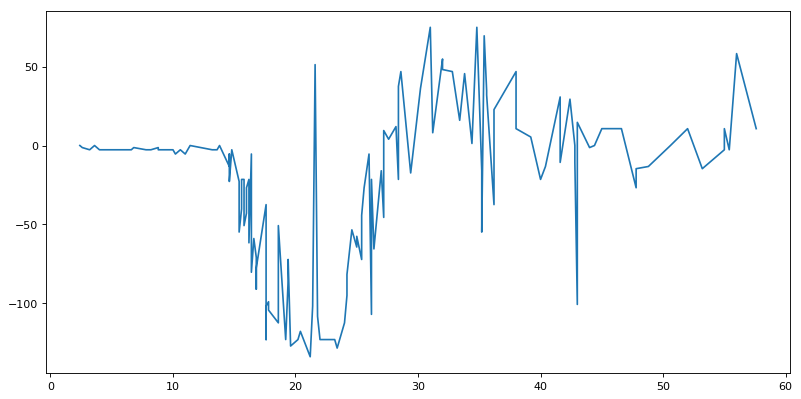

In [12]:
df = pd.read_csv('non-parametric.csv', sep=';')
x, y = df.x, df.y
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y)
plt.show()

136

In [37]:
reg = NonParametricRegression()

In [38]:
y_pred = reg.train(list(x), list(y))

[4.1999999999999993, 3.9999999999999996, 3.3999999999999995, 2.9999999999999996, 2.5999999999999996, 2.6000000000000001, 2.2000000000000011, 2.0000000000000009, 1.5999999999999996, 1.5999999999999996, 1.7999999999999989, 1.7999999999999989, 1.4000000000000004, 1.1999999999999993, 1.3999999999999986, 1.7999999999999989, 2.1999999999999993, 1.8000000000000007, 1.4000000000000004, 1.0, 0.79999999999999893, 0.80000000000000071, 0.80000000000000071, 0.80000000000000071, 0.80000000000000071, 0.80000000000000071, 0.80000000000000071, 0.20000000000000107, 0.59999999999999964, 0.59999999999999964, 0.59999999999999964, 0.59999999999999964, 0.20000000000000107, 0.20000000000000107, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.39999999999999858, 0.40000000000000213, 0.60000000000000142, 0.60000000000000142, 0.60000000000000142, 1.0, 1.0, 1.0, 1.0, 0.80000000000000071, 0.8000

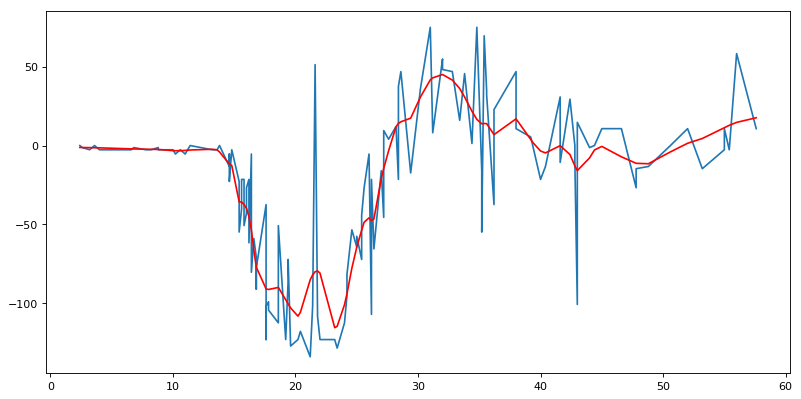

In [42]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, x, y_pred, 'r')
plt.show()

TypeError: pred() missing 1 required positional argument: 'y'